# LOGISTIC REGRESSION

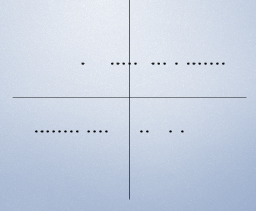

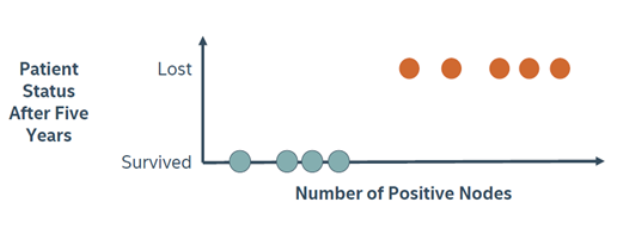

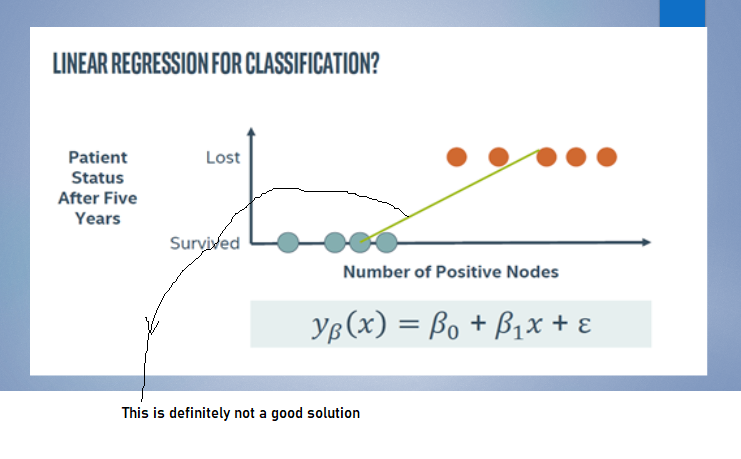

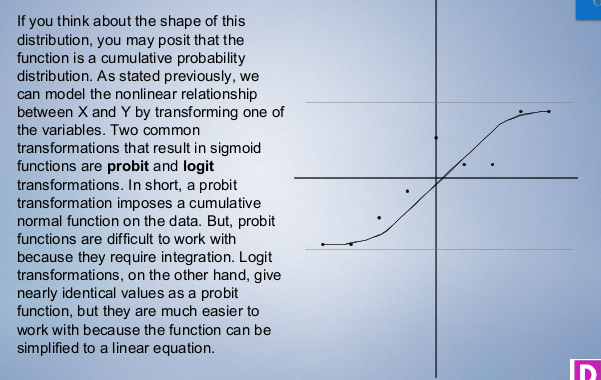

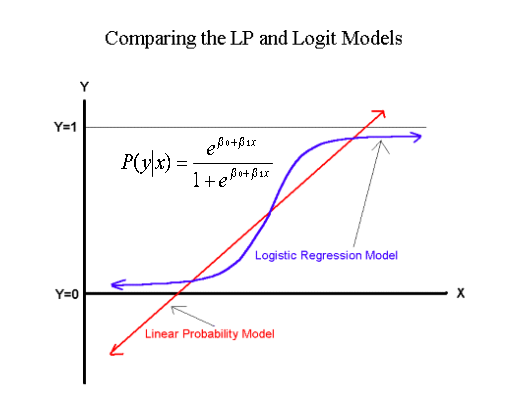

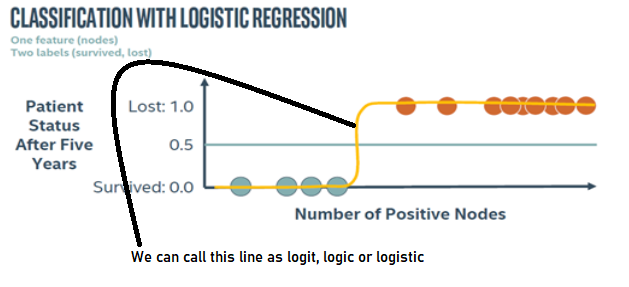

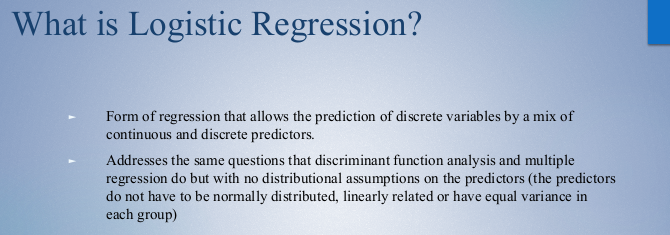

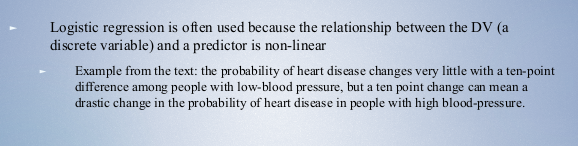

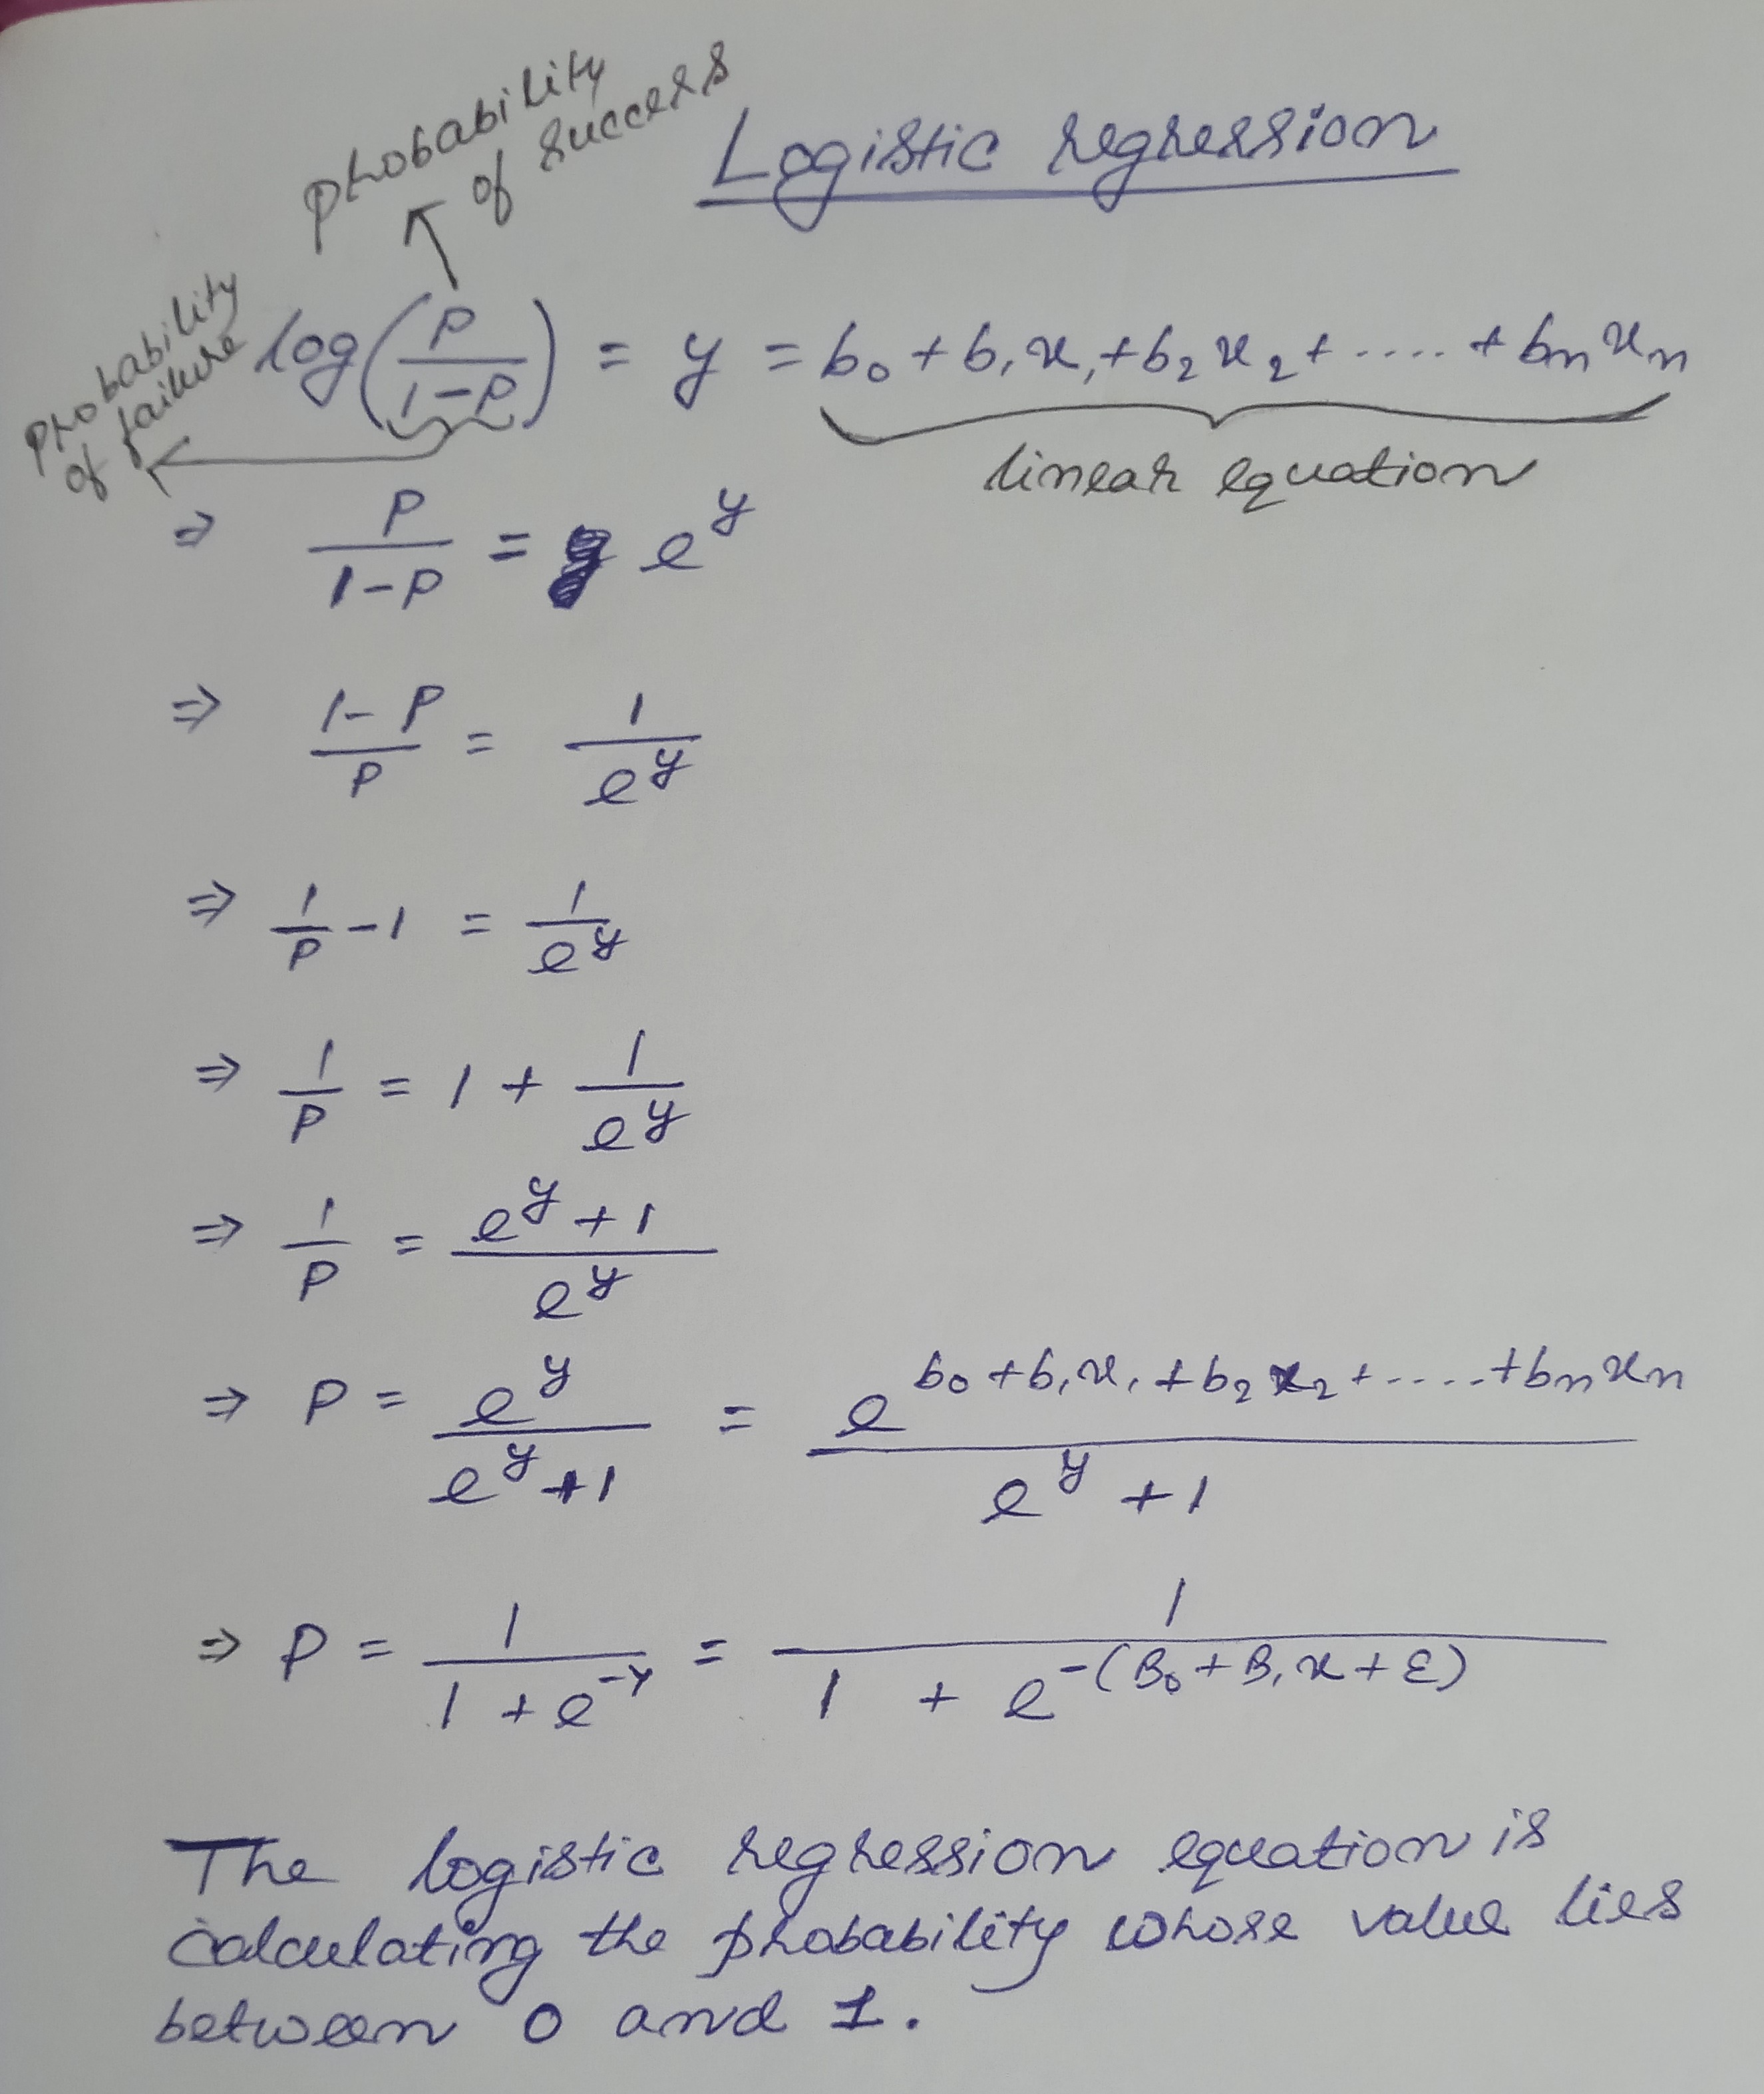

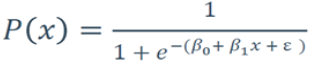

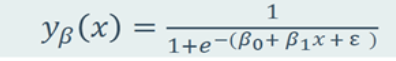

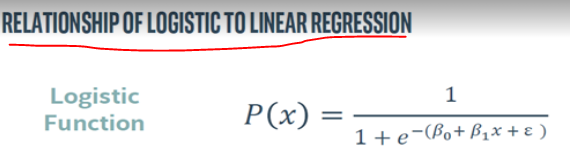

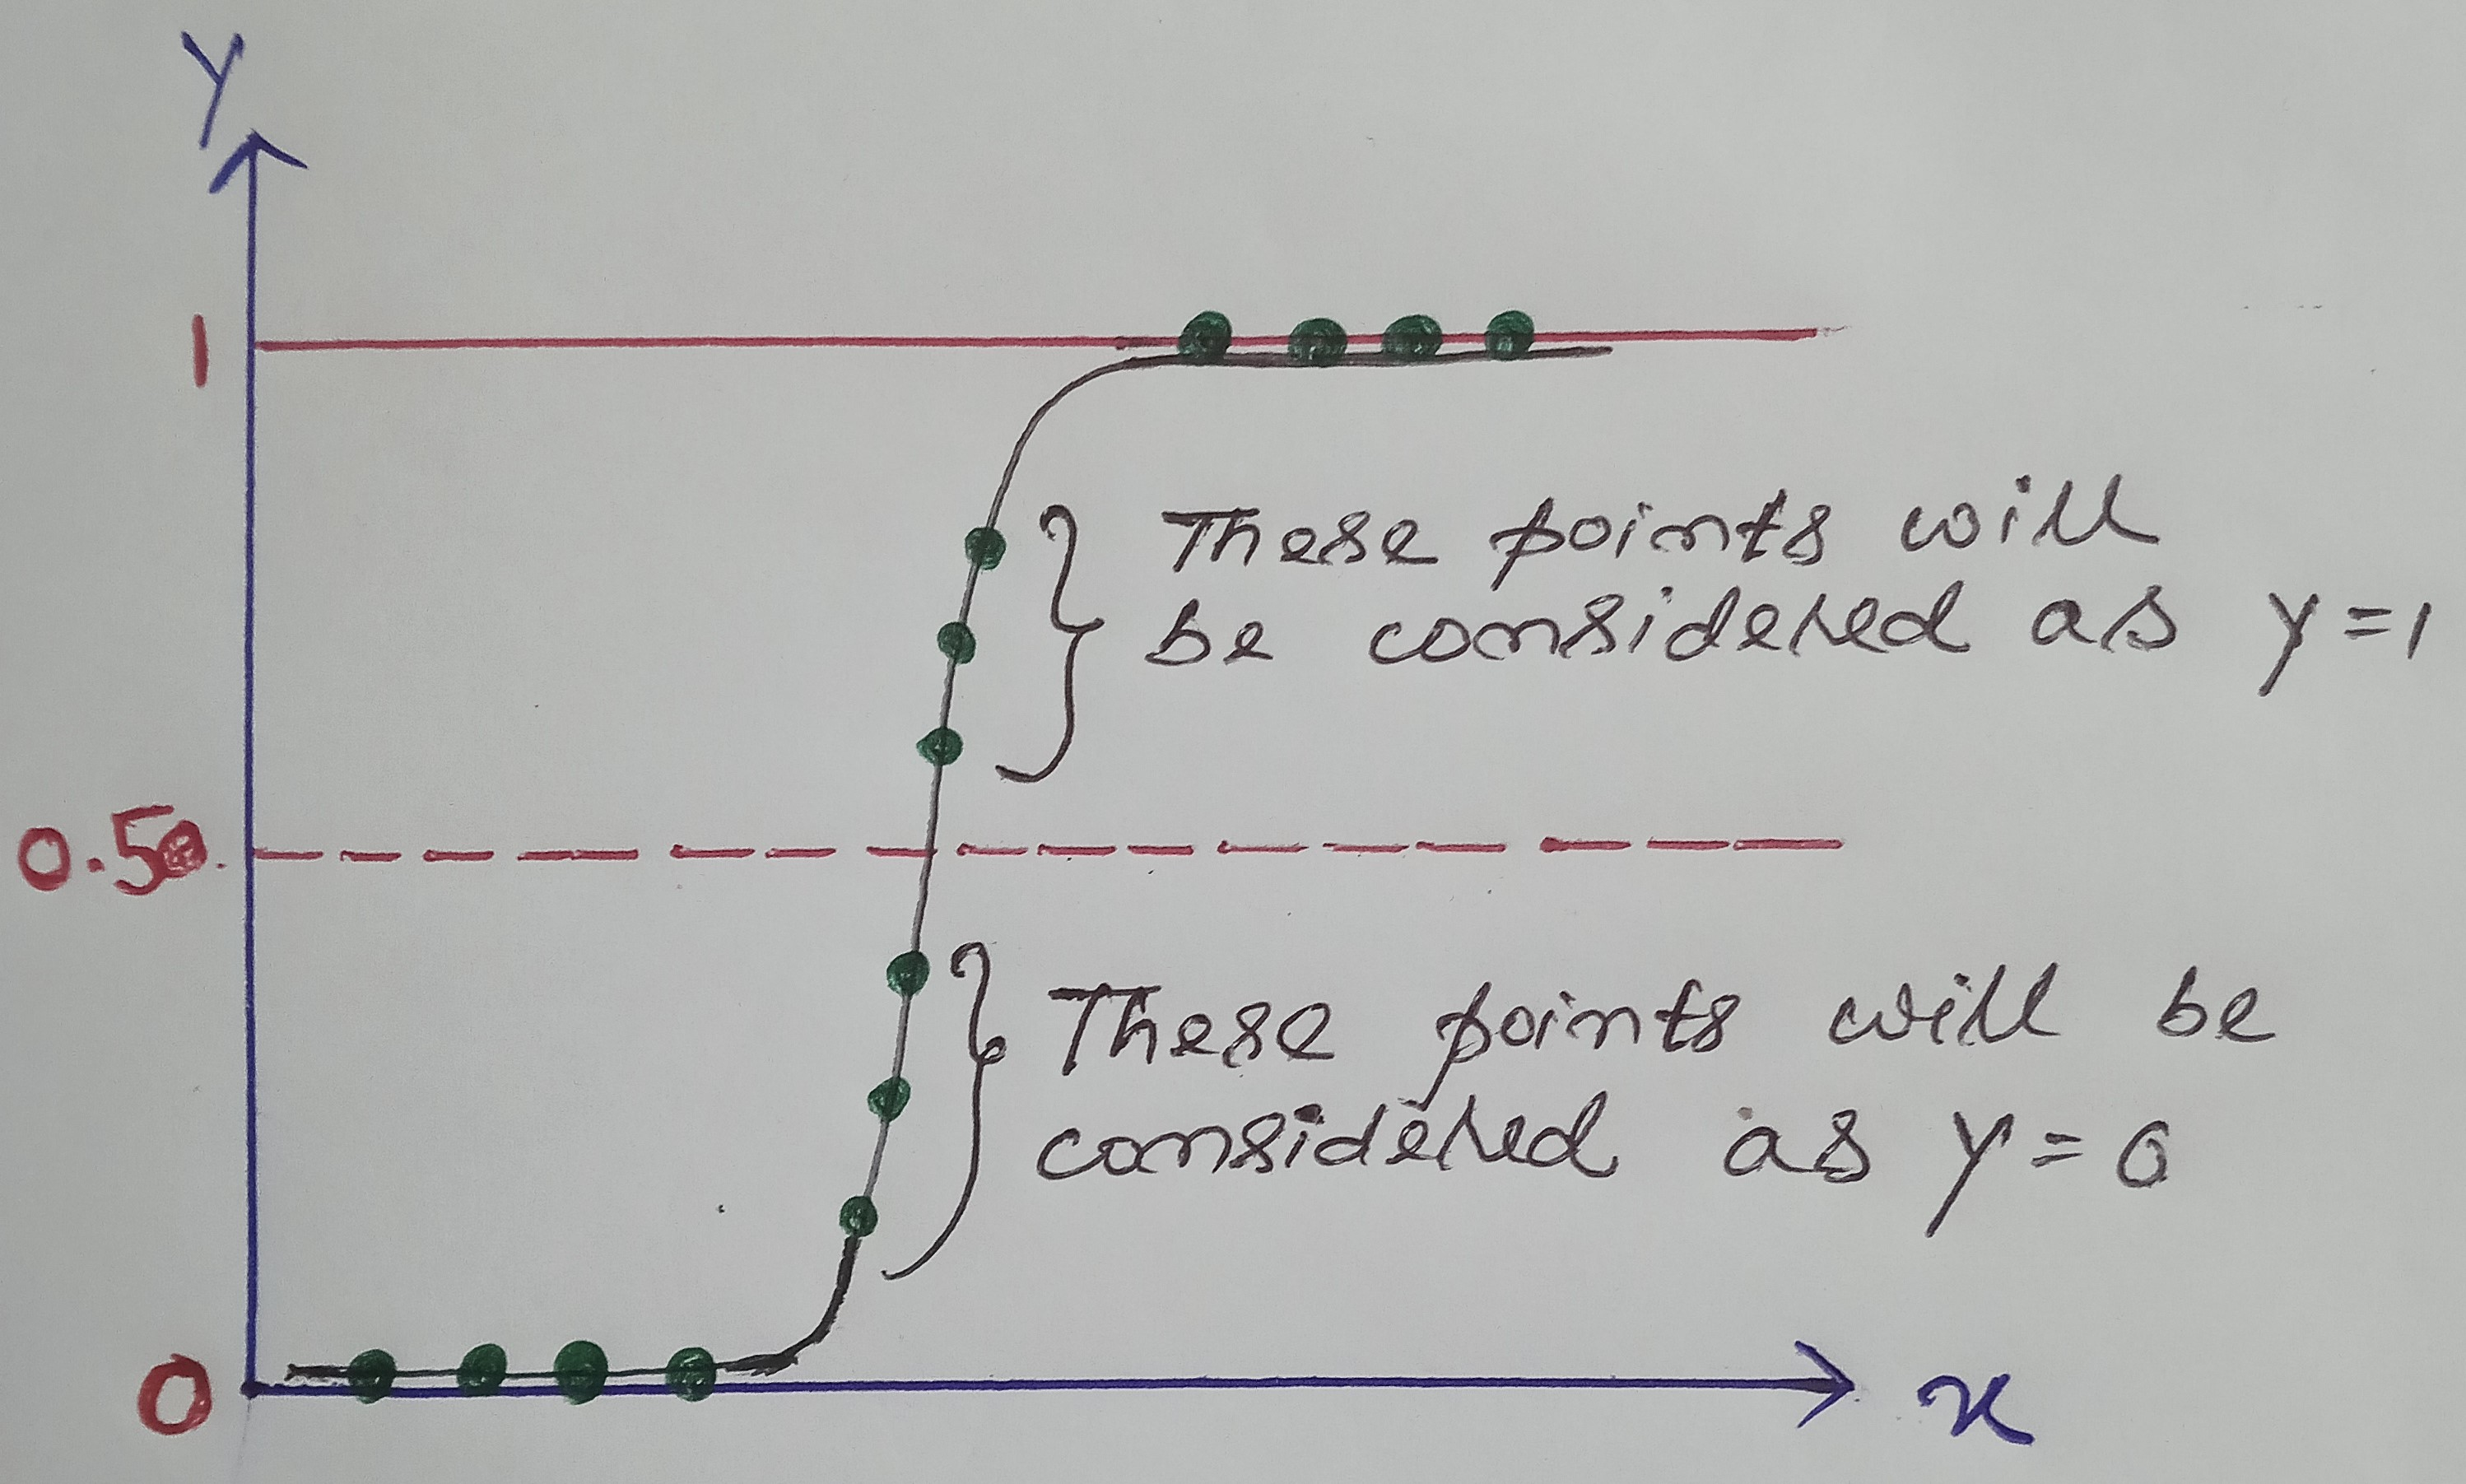

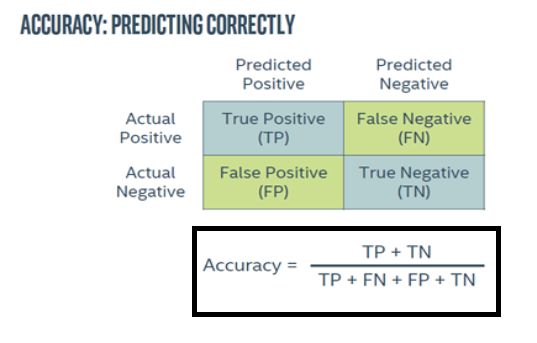

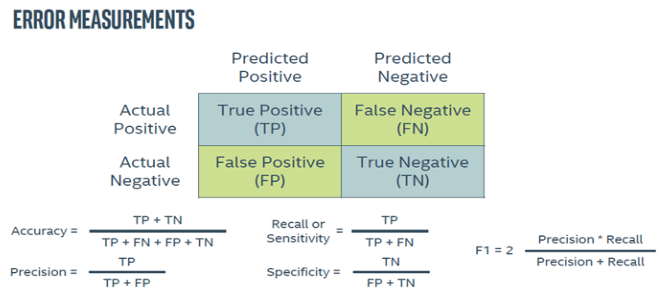

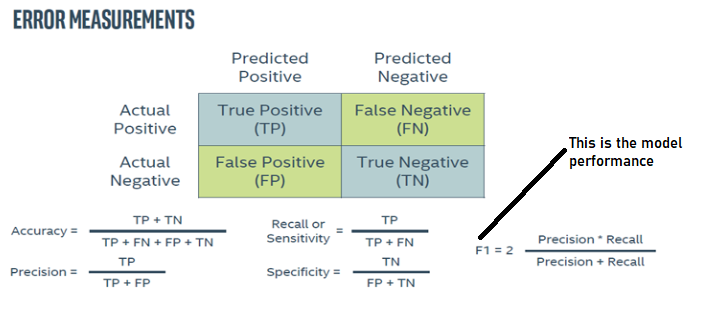

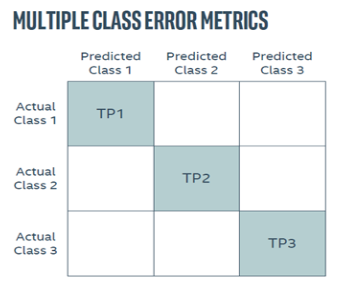

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report  #sklearn.metrics is generally used for error measurement.
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#In sklearn.metrics, sklearn is the library or module.
#metrics is a class inside sklearn library.
#confusion_matrix is the method.

In [2]:
dataset=load_breast_cancer()

In [3]:
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
dataset.keys()   #.keys() is a method(functions inside a class)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
dataset.feature_names  #.feature_names is an attribute(variables inside a class.)

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
dataset.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
dataset.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [9]:
dfcancer=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [10]:
dfcancer

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [11]:
dfcancer['target']=pd.DataFrame(dataset.target) #adding the target column to the DataFrame.

In [12]:
dfcancer

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

# Performing the EDA

In [13]:
dfcancer.info() #This dataset donot contain any null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [14]:
dfcancer.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [15]:
dfcancer.target.unique()

array([0, 1])

In [16]:
dfcancer.target.value_counts()

1    357
0    212
Name: target, dtype: int64

<AxesSubplot:>

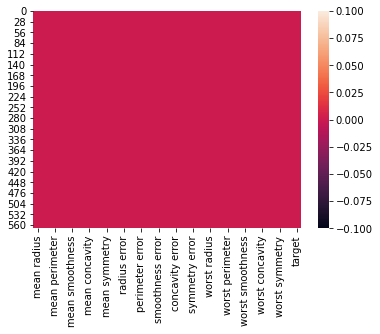

In [17]:
sns.heatmap(dfcancer.isnull())

In [18]:
dfcor=dfcancer.corr()
dfcor

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -0.097317      0.386358       -0.086761  -0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error           -0.222600      0.006614       -0.202694  -0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error             -0.104321      0.009127       -0.081629  -0.072497   
fractal dimension error    -0.042641      0.054458       -0.005523  -0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   
target                     -0.730029     -0.415185       -0.742636  -0.708984   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                   -0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error        

<AxesSubplot:>

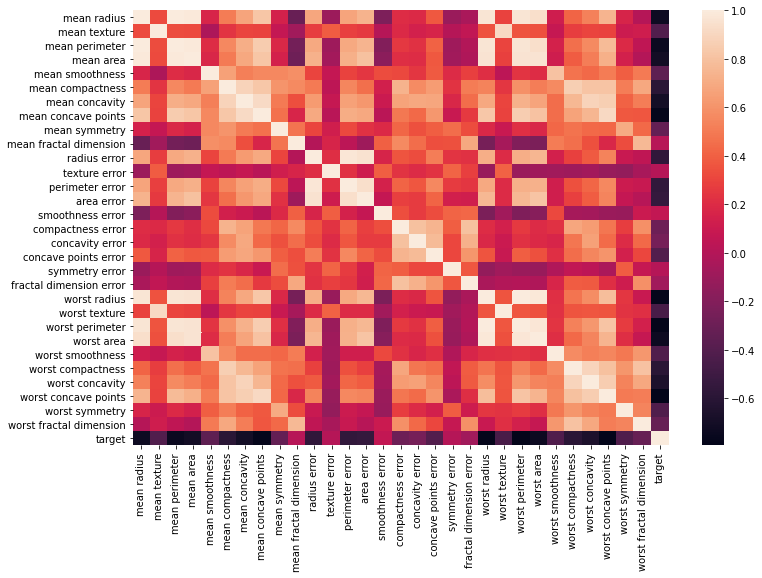

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor)

mean radius                   AxesSubplot(0.125,0.772143;0.110714x0.107857)
mean texture               AxesSubplot(0.257857,0.772143;0.110714x0.107857)
mean perimeter             AxesSubplot(0.390714,0.772143;0.110714x0.107857)
mean area                  AxesSubplot(0.523571,0.772143;0.110714x0.107857)
mean smoothness            AxesSubplot(0.656429,0.772143;0.110714x0.107857)
mean compactness           AxesSubplot(0.789286,0.772143;0.110714x0.107857)
mean concavity                AxesSubplot(0.125,0.642714;0.110714x0.107857)
mean concave points        AxesSubplot(0.257857,0.642714;0.110714x0.107857)
mean symmetry              AxesSubplot(0.390714,0.642714;0.110714x0.107857)
mean fractal dimension     AxesSubplot(0.523571,0.642714;0.110714x0.107857)
radius error               AxesSubplot(0.656429,0.642714;0.110714x0.107857)
texture error              AxesSubplot(0.789286,0.642714;0.110714x0.107857)
perimeter error               AxesSubplot(0.125,0.513286;0.110714x0.107857)
area error  

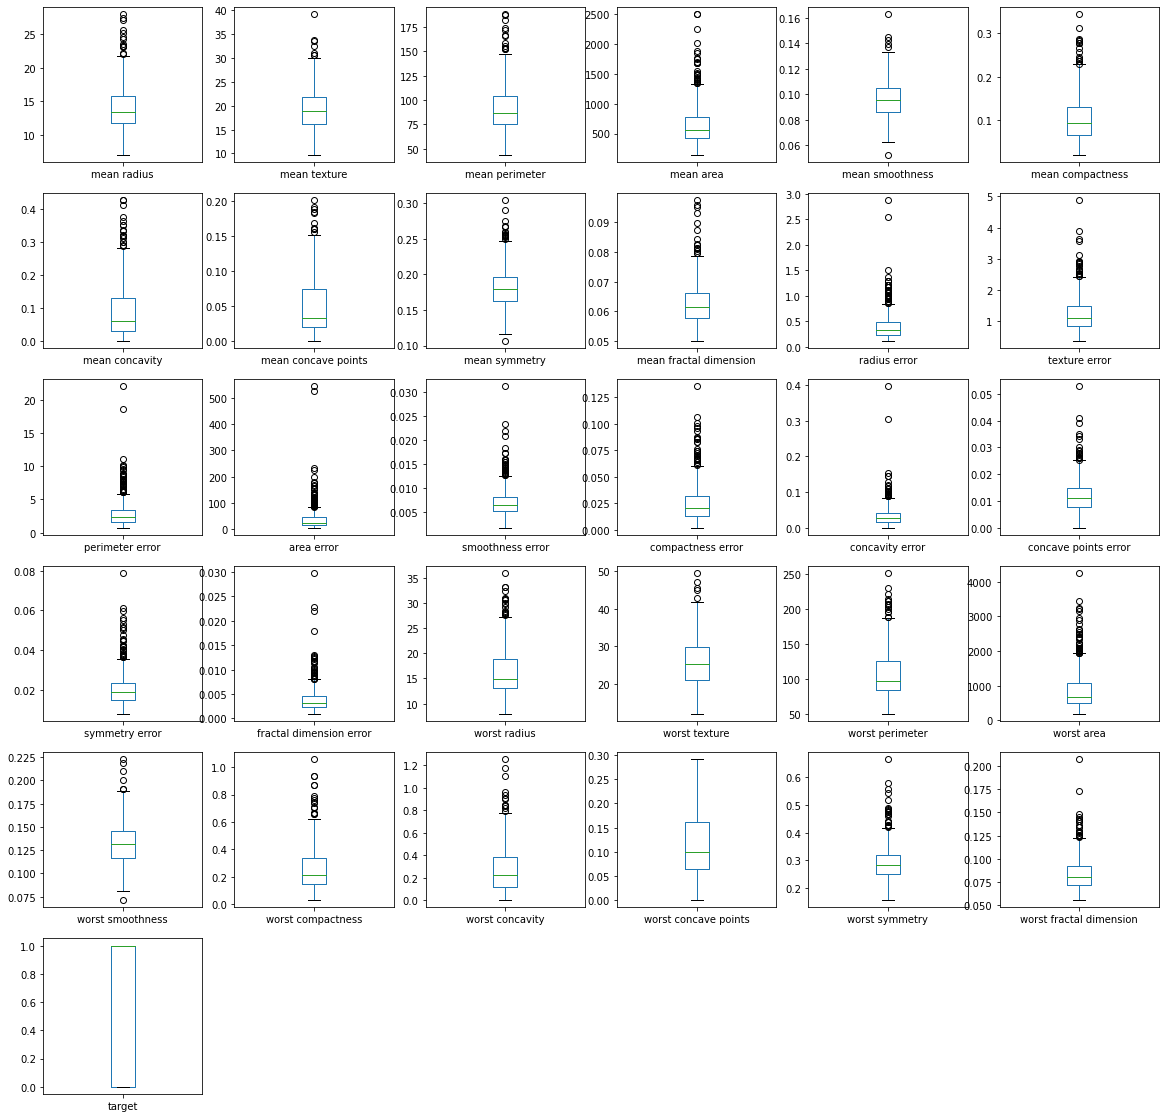

In [20]:
dfcancer.plot(kind='box',subplots=True,layout=(6,6),figsize=(20,20))

# Checking for skewness

<AxesSubplot:xlabel='worst area', ylabel='Density'>

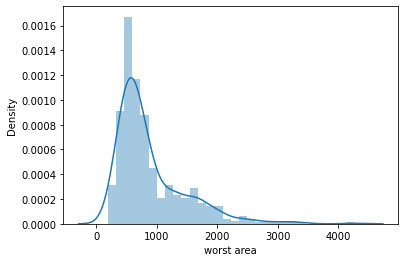

In [21]:
sns.distplot(dfcancer['worst area'])

# Skewness removal

In [22]:
from scipy.stats import boxcox
#0 -> log transform
#.5-> square root transform
dfcancer['worst area']=boxcox(dfcancer['worst area'],0)    #for the purpose of removing skewness

<AxesSubplot:xlabel='worst area', ylabel='Density'>

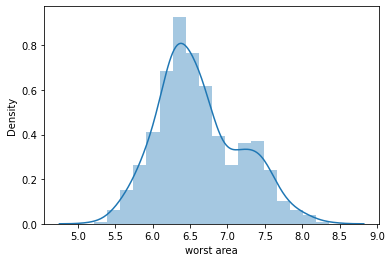

In [23]:
sns.distplot(dfcancer['worst area'])

In [24]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(dfcancer))
z

array([[1.09706398, 2.07333501, 1.26993369, ..., 2.75062224, 1.93701461,
        1.29767572],
       [1.82982061, 0.35363241, 1.68595471, ..., 0.24388967, 0.28118999,
        1.29767572],
       [1.57988811, 0.45618695, 1.56650313, ..., 1.152255  , 0.20139121,
        1.29767572],
       ...,
       [0.70228425, 2.0455738 , 0.67267578, ..., 1.10454895, 0.31840916,
        1.29767572],
       [1.83834103, 2.33645719, 1.98252415, ..., 1.91908301, 2.21963528,
        1.29767572],
       [1.80840125, 1.22179204, 1.81438851, ..., 0.04813821, 0.75120669,
        0.77060855]])

In [25]:
df_new_cancer=dfcancer[(z<3).all(axis=1)]
df_new_cancer

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
4          20.29         14.34          135.10     1297.0          0.10030   
5          12.45         15.70           82.57      477.1          0.12780   
6          18.25         19.98          119.60     1040.0          0.09463   
..           ...           ...             ...        ...              ...   
560        14.05         27.15           91.38      600.4          0.09929   
563        20.92         25.09          143.00     1347.0          0.10990   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
4             0.13280         0.19800              0.10430         0.1809   
5             0.17000         0.15780              0.08089         0.2087   
6             0.10900         0.11270              0.07400         0.1794   
..                ...             ...                  ...            ...   
560           0.11260         0.04462              0.04304         0.1537   
563           0.22360         0.31740              0.14740         0.2149   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
1                   0.05667  ...          23.41            158.8    7.578657   
2                   0.05999  ...          25.53            152.5    7.443664   
4                   0.05883  ...          16.67            152.2    7.362011   
5                   0.07613  ...          23.75            103.4    6.608810   
6                   0.05742  ...          27.66            153.2    7.381502   
..                      ...  ...            ...              ...         ...   
560                 0.06171  ...          33.17            100.2    6.560606   
563                 0.06879  ...          29.41            179.1    7.506042   
564                 0.05623  ...          26.40            166.1    7.614312   
565                 0.05533  ...          38.25            155.0    7.456455   
566                 0.05648  ...          34.12            126.7    7.024649   

     worst smoothness  worst compactness  worst concavity  \
1              0.1238             0.1866           0.2416   
2              0.1444             0.4245           0.4504   
4              0.1374             0.2050           0.4000   
5              0.1791             0.5249           0.5355   
6              0.1442             0.2576           0.3784   
..                ...                ...              ...   
560            0.1241             0.2264           0.1326   
563            0.1407             0.4186           0.6599   
564            0.1410             0.2113           0.4107   
565            0.1166             0.1922           0.3215   
566            0.1139             0.3094           0.3403   

     worst concave points  worst symmetry  worst fractal dimension  target  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
4                  0.1625          0.2364                  0.07678       0  
5                  0.1741          0.3985                  0.12440       0  
6                  0.1932          0.3063                  0.083

In [26]:
dfcancer=df_new_cancer

In [27]:
dfcancer

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
4          20.29         14.34          135.10     1297.0          0.10030   
5          12.45         15.70           82.57      477.1          0.12780   
6          18.25         19.98          119.60     1040.0          0.09463   
..           ...           ...             ...        ...              ...   
560        14.05         27.15           91.38      600.4          0.09929   
563        20.92         25.09          143.00     1347.0          0.10990   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
4             0.13280         0.19800              0.10430         0.1809   
5             0.17000         0.15780              0.08089         0.2087   
6             0.10900         0.11270              0.07400         0.1794   
..                ...             ...                  ...            ...   
560           0.11260         0.04462              0.04304         0.1537   
563           0.22360         0.31740              0.14740         0.2149   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
1                   0.05667  ...          23.41            158.8    7.578657   
2                   0.05999  ...          25.53            152.5    7.443664   
4                   0.05883  ...          16.67            152.2    7.362011   
5                   0.07613  ...          23.75            103.4    6.608810   
6                   0.05742  ...          27.66            153.2    7.381502   
..                      ...  ...            ...              ...         ...   
560                 0.06171  ...          33.17            100.2    6.560606   
563                 0.06879  ...          29.41            179.1    7.506042   
564                 0.05623  ...          26.40            166.1    7.614312   
565                 0.05533  ...          38.25            155.0    7.456455   
566                 0.05648  ...          34.12            126.7    7.024649   

     worst smoothness  worst compactness  worst concavity  \
1              0.1238             0.1866           0.2416   
2              0.1444             0.4245           0.4504   
4              0.1374             0.2050           0.4000   
5              0.1791             0.5249           0.5355   
6              0.1442             0.2576           0.3784   
..                ...                ...              ...   
560            0.1241             0.2264           0.1326   
563            0.1407             0.4186           0.6599   
564            0.1410             0.2113           0.4107   
565            0.1166             0.1922           0.3215   
566            0.1139             0.3094           0.3403   

     worst concave points  worst symmetry  worst fractal dimension  target  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
4                  0.1625          0.2364                  0.07678       0  
5                  0.1741          0.3985                  0.12440       0  
6                  0.1932          0.3063                  0.083

In [28]:
x=dfcancer.iloc[:,0:-1]

In [29]:
y=dfcancer.iloc[:,-1]

In [30]:
x.shape

(496, 30)

In [31]:
y.shape

(496,)

In [32]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=45)

In [33]:
train_x.shape

(396, 30)

In [34]:
test_x.shape

(100, 30)

In [35]:
train_y.shape

(396,)

In [36]:
test_y.shape

(100,)

In [37]:
lg=LogisticRegression() # 'lg' object is initiated from LogisticRegression() class.

In [38]:
lg.fit(train_x,train_y)    #training the model using fit() method.

LogisticRegression()

In [39]:
pred=lg.predict(test_x)    #obtaining the output from the model for test_x and storing it in a variable.
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1]


In [40]:
print("accuracy_score:",accuracy_score(test_y,pred))

accuracy_score: 0.93


In [41]:
print(confusion_matrix(test_y,pred))
#confusion_matrix is a method inside metrics class.
#metrics is a class inside sklearn library.

[[22  4]
 [ 3 71]]


In [42]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        26
           1       0.95      0.96      0.95        74

    accuracy                           0.93       100
   macro avg       0.91      0.90      0.91       100
weighted avg       0.93      0.93      0.93       100



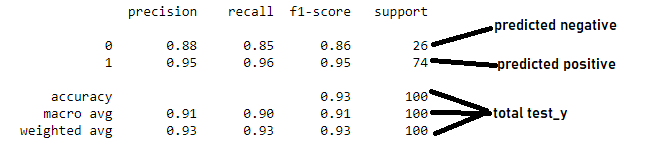

# APPLYING LOGISTIC REGRESSION ON SONAR DATASET

In [43]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [44]:
data=pd.read_csv('sonar.csv',names=range(0,61),header=0)

In [45]:
data=pd.DataFrame(data=data)
data

0       1       2       3       4       5       6       7       8   \
0    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
202  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
203  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
204  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
205  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
206  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      51      52      53      54      55      56      57  \
0    0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
1    0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
2    0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
3    0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
4    0.3039  ...  0.0045  0.0014  0.0038  0.0013  0.0089  0.0057  0.0027   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
202  0.2684  ...  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065  0.0115   
203  0.2154  ...  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034  0.0032   
204  0.2529  ...  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140  0.0138   
205  0.2354  ...  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034  0.0079   
206  0.2354  ...  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040  0.0036   

         58      59  60  
0    0.0052  0.0044   R  
1    0.0095  0.0078   R  
2    0.0040  0.0117   R  
3    0.0107  0.0094   R  
4    0.0051  0.0062   R  
..      ...     ...  ..  
202  0.0193  0.0157   M  
203  0.0062  0.0067   M  
204  0.0077  0.0031   M  
205  0.0036  0.0048   M  
206  0.0061  0.0115   M  

[207 rows x 61 columns]

In [46]:
from sklearn.decomposition import PCA
#We can use PCA to compress data by making our machine learning algoriths faster and dataset smaller
#PCA is a dimensionality reduction method that is used to reduce the dimensionality of large datasets, transfroming a large set of variables into smaller one that still contains most of the information in the large set.


In [47]:
x=data.iloc[:,0:-1]

In [48]:
pca=PCA(n_components=10) #object/instance creation from class. Here pca will take only 10 columns from the DataFrame on which it will be applied

In [49]:
y=data.iloc[:,-1]

In [50]:
xpca=pca.fit_transform(x) #fit_transfrom is used to scale data in all columns in same scale.
#pca is the object. fit_transform is the method.

In [51]:
x=xpca

In [52]:
pd.DataFrame(data=x)       #Here we can see that the number of columns is reduced to 10 because of PCA

0         1         2         3         4         5         6  \
0   -0.970285  1.017654  0.830432  0.120147  0.299120  0.202682 -0.226988   
1   -0.324435  0.876876  0.228203  0.868926  0.098053 -0.269122 -0.421778   
2    0.853571  0.697734 -0.023602 -0.123425 -0.584388  0.351808  0.478187   
3   -0.061337  0.226034  0.635198  0.152907  0.150982  0.081111 -0.374523   
4   -0.605423  0.901962  0.804550  0.271896  0.496832  0.464410 -0.224909   
..        ...       ...       ...       ...       ...       ...       ...   
202  0.049918 -1.028980  0.265634  0.026018 -0.014738  0.097506  0.012021   
203  0.228374 -1.149870  0.200437  0.043461  0.182020  0.010158  0.084858   
204  0.306763 -1.147756  0.248975 -0.058557  0.161337  0.013778  0.049391   
205 -0.038083 -0.994049  0.201938 -0.060790 -0.147673 -0.088874  0.018656   
206 -0.043904 -0.910802  0.009169 -0.045577 -0.030723 -0.033778  0.025213   

            7         8         9  
0    0.384837  0.004329 -0.082679  
1    0.081072  0.014185 -0.432334  
2   -0.215424 -0.533955 -0.425182  
3    0.070143  0.119454 -0.427480  
4    0.105504 -0.202842 -0.235048  
..        ...       ...       ...  
202  0.178998  0.029362 -0.268631  
203  0.266152 -0.068963 -0.307679  
204  0.227866 -0.070132 -0.313294  
205  0.069504 -0.024406 -0.165303  
206 -0.019100  0.120130 -0.137964  

[207 rows x 10 columns]

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=42)

In [54]:
lr=LogisticRegression() #object creation from LogisticRegression class.

In [55]:
lr.fit(x_train,y_train) #training the dataset
lr.score(x_train,y_train)
predlr=lr.predict(x_test) #calcualting the output from x_test using the new model created
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7391304347826086
[[18 10]
 [ 2 16]]
              precision    recall  f1-score   support

           M       0.90      0.64      0.75        28
           R       0.62      0.89      0.73        18

    accuracy                           0.74        46
   macro avg       0.76      0.77      0.74        46
weighted avg       0.79      0.74      0.74        46

